Importing the Libraries

In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [5]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

Correlation:

1.Positive Correlation

2.Negative Correlation

In [6]:
correlation = gold_data.corr()

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_7524\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

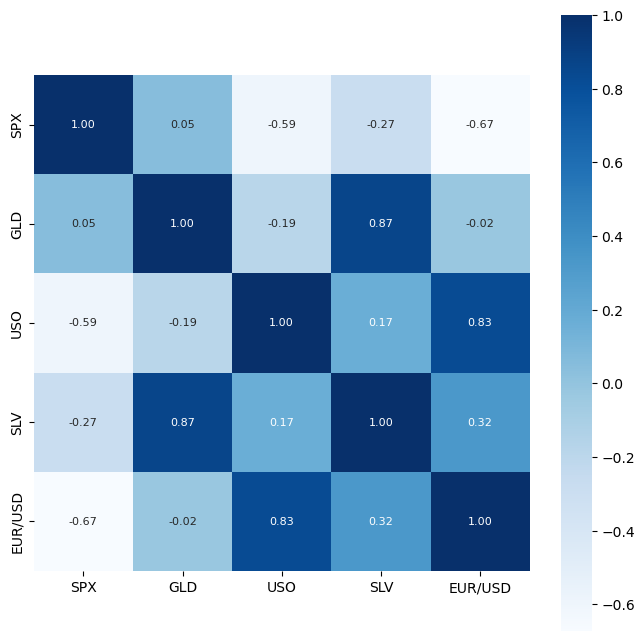

In [7]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [8]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\Abhishek\AppData\Local\Temp\ipykernel_7524\563101706.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

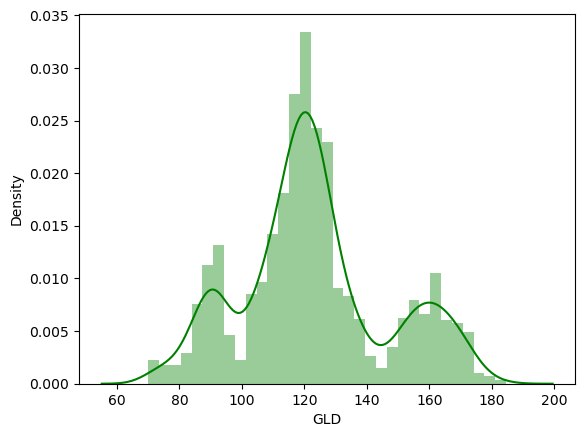

In [9]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [10]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [11]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [12]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [14]:
print(X_train)

              SPX        USO        SLV   EUR/USD
476   1138.500000  39.790001  16.889999  1.361693
1958  2202.939941  10.630000  15.800000  1.063886
248    700.820007  24.480000  12.770000  1.256408
2231  2656.000000  11.890000  15.570000  1.225280
1325  1838.880005  33.040001  19.420000  1.366998
...           ...        ...        ...       ...
1071  1409.150024  32.320000  32.980000  1.287515
433   1132.989990  40.270000  17.230000  1.442398
674   1286.119995  38.610001  27.389999  1.357276
1099  1461.890015  33.919998  29.180000  1.306745
1608  2092.429932  18.500000  15.600000  1.057295

[1832 rows x 4 columns]


Model Training: Random Forest Regressor

In [15]:
regressor = RandomForestRegressor(n_estimators=100)

In [17]:
 # training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [18]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)
print(test_data_prediction)

[168.56739934  82.10969971 116.11030009 127.64760083 120.72700125
 154.82159698 150.35539926 126.05020034 117.46719868 125.9065005
 116.82890108 172.10350051 141.24889866 167.5203988  115.21060004
 117.51540048 138.55990231 170.08370095 159.60910328 156.27729939
 155.11879995 124.75300009 176.39969933 156.9960039  125.21150046
  94.03639989  76.25580057 120.71330012 119.13189949 167.45710014
  88.1683007  125.34020029  91.02570031 117.71400014 121.15069895
 136.40020054 115.30290136 115.20860068 149.85429991 107.26270106
 104.59280282  87.17279761 126.47800043 117.71550026 153.30599901
 119.54730016 108.4897999  108.0423978   93.10510029 127.13019756
  74.79880063 113.58839928 121.44749988 111.31089927 118.97259894
 120.82529933 158.70060005 167.51200178 147.06419708  85.79469838
  94.30630028  86.87029914  90.87090057 118.99520082 126.41210022
 127.49690022 168.17729947 122.22989932 117.26469883  98.42059998
 168.17860082 143.16679845 132.0224026  121.19400208 121.7293994
 119.7434008

In [19]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890207625578163


Compare the Actual Values and Predicted Values in a Plot

In [20]:
Y_test = list(Y_test)

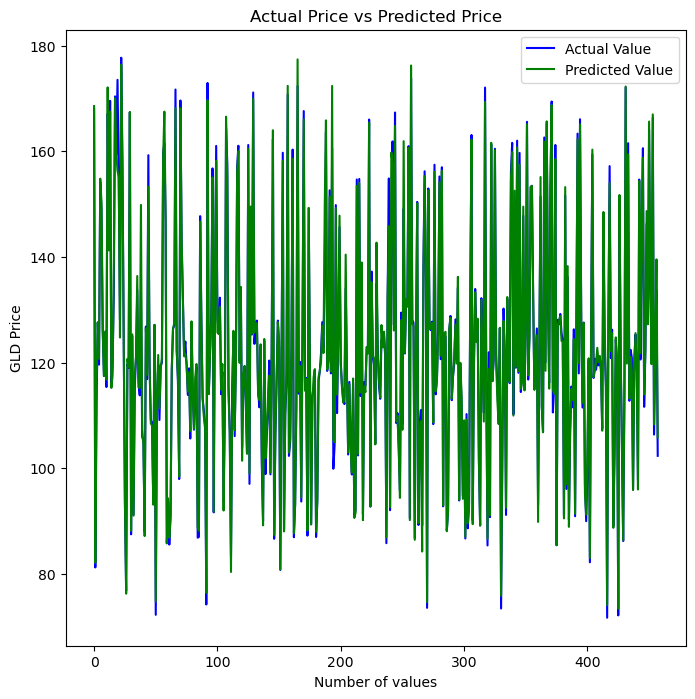

In [24]:
plt.figure(figsize = (8,8))
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()